## Videogames sales dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['font.size'] = 20

In [3]:
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
data.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
11639,Dangerous Ji-San to 1000-nin no Otomodachi Yok...,3DS,2012.0,Action,Namco Bandai Games,0.00,0.00,0.08,0.00,0.08,NaN,NaN,NaN,NaN,NaN,NaN
11810,The Hustle: Detroit Streets,PSP,2005.0,Sports,Deep Silver,0.07,0.00,0.00,0.01,0.07,51.0,11.0,5.3,4.0,Blade Interactive,T
15829,Goblin Commander: Unleash the Horde,GC,2003.0,Strategy,Jaleco,0.01,0.00,0.00,0.00,0.02,71.0,19.0,7.8,6.0,Jaleco Entertainment,T
6007,The New Tetris,N64,1999.0,Puzzle,Nintendo,0.22,0.05,0.02,0.00,0.29,NaN,NaN,NaN,NaN,NaN,NaN
8814,Serious Sam,XB,2002.0,Shooter,Take-Two Interactive,0.11,0.03,0.00,0.01,0.15,75.0,22.0,8.2,16.0,Croteam,M


### Cleanup: Nan Handling

* Zero sales is likely to be a missing data (or product not released in the region) 

In [4]:
data['NA_Sales'] = data['NA_Sales'].replace(0, np.nan)
data['EU_Sales'] = data['EU_Sales'].replace(0, np.nan)
data['JP_Sales'] = data['JP_Sales'].replace(0, np.nan)
data['Global_Sales'] = data['Global_Sales'].replace(0, np.nan)

In [5]:
data.sample(4)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1707,LEGO Indiana Jones 2: The Adventure Continues,DS,2009.0,Action,Activision,0.65,0.42,NaN,0.11,1.18,59.0,4.0,tbd,NaN,TT Fusion,E
1509,Yoshi's Woolly World,WiiU,2015.0,Platform,Nintendo,0.62,0.47,0.11,0.10,1.30,78.0,83.0,8.5,376.0,Good-Feel,E
4816,Rocket Power: Dream Scheme,GBA,2001.0,Action,THQ,0.29,0.11,NaN,0.01,0.40,NaN,NaN,NaN,NaN,NaN,NaN
8101,Shadow The Hedgehog,XB,2005.0,Platform,Sega,0.13,0.04,NaN,0.01,0.18,49.0,24.0,5.5,36.0,Sega,E10+


### Cleanup: Type handling

Check out the dataframe data types:

In [6]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

``User_Score`` was expected to be numeric, but it is object. Typical cause: some elements are strings!

### Cleanup: Type handling


In [7]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Some videogames are rated 'tbd' (maybe to be defined ?!)

In [8]:
data['User_Score'] = data['User_Score'].replace('tbd', np.nan) # replace 'tbd' with np.nan
data['User_Score'] = data['User_Score'].astype(np.float) # cast to float
#data['Year_of_Release'] = data['Year_of_Release'].astype(np.int) # cast to float

### Preparation: units

Critic Score is in range [0, 100], User Score in range [0, 10]

In [9]:
data['User_Score'] = data['User_Score'] * 10 # Easy fix

## Market by platform

In [10]:
platform_sales = data[["Platform", "Global_Sales"]].groupby("Platform").sum().sort_values(by="Global_Sales", ascending=False).reset_index()
platform_sales.head(5)

,Platform,Global_Sales
0,PS2,1255.64
1,X360,971.63
2,PS3,939.43
3,Wii,908.13
4,DS,807.10


## Market by platform

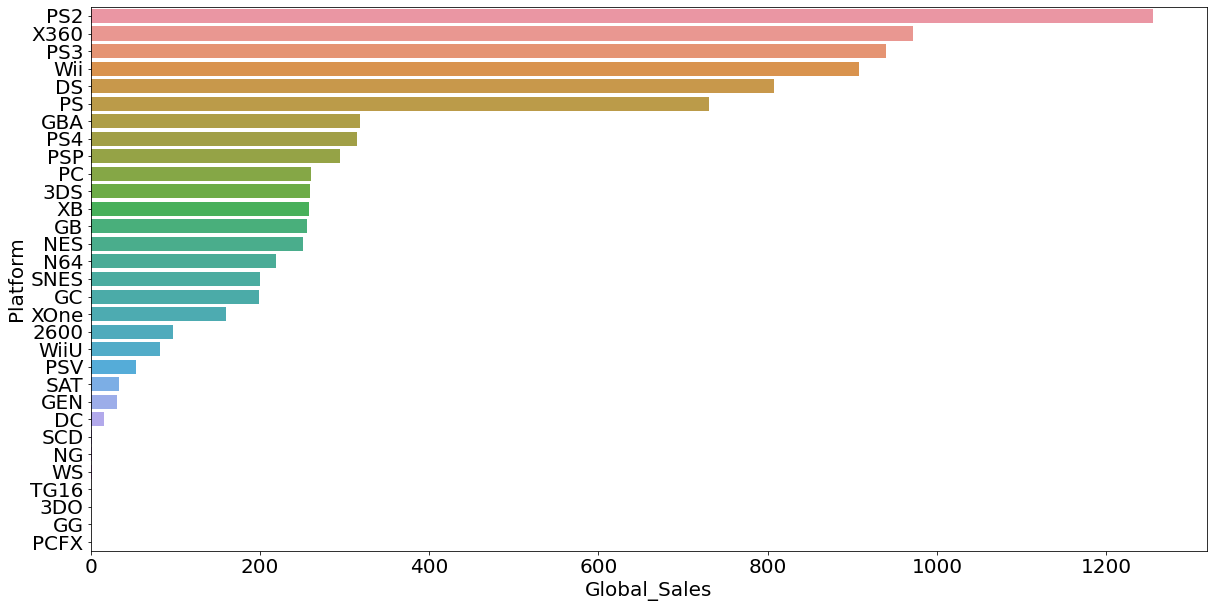

In [11]:
plt.figure(figsize=(20, 10))
sns.barplot(data=platform_sales, y="Platform", x="Global_Sales");

## Market by genre

In [12]:
genre_sales = data.groupby("Genre").sum().sort_values(by="Global_Sales", ascending=False).reset_index()
genre_sales.head(3)

,Genre,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Action,6642630.0,879.01,519.13,161.44,184.60,1745.27,125929.0,52506.0,129089.0,345668.0
1,Sports,4624690.0,684.43,376.79,135.54,134.51,1332.00,85930.0,25110.0,76782.0,45849.0
2,Shooter,2599819.0,592.24,317.34,38.76,104.11,1052.94,66251.0,33616.0,65067.0,346110.0


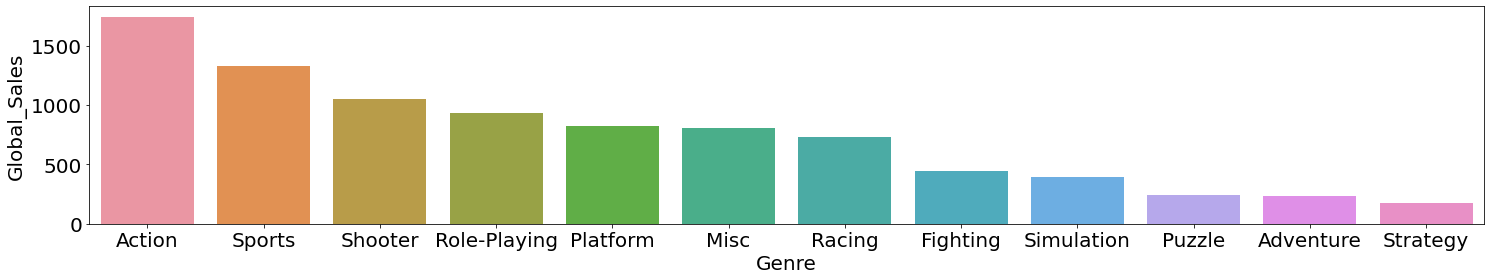

In [13]:
plt.figure(figsize=(25, 4))
sns.barplot(data=genre_sales, x="Genre", y="Global_Sales");

## Market by publisher

In [14]:
pub_sales = data.groupby("Publisher").sum().sort_values(by="Global_Sales", ascending=False).reset_index()

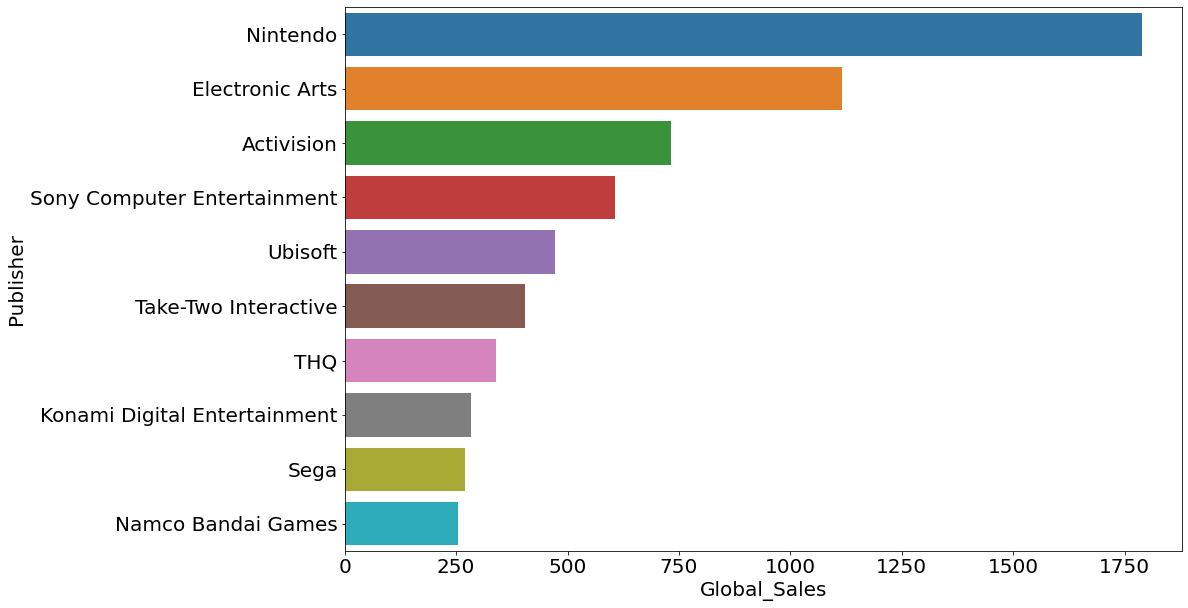

In [15]:
plt.figure(figsize=(15, 10))
g=sns.barplot(data=pub_sales.iloc[0:10], y="Publisher", x="Global_Sales");

In [16]:
#sns.pairplot(data=data)

## Market Correlation Analysis

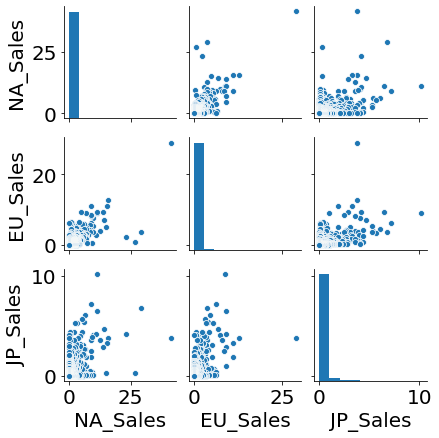

In [17]:
idx_sales = (data['NA_Sales'] != np.nan) & (data['EU_Sales'] != np.nan) & (data['JP_Sales'] != np.nan)
data_sales = data[idx_sales]
data_sales = data_sales[['NA_Sales', 'EU_Sales', 'JP_Sales']]
sns.pairplot(data=data_sales, height=2.0);

EU and NA market are strongly correlated with each other. 
JP market is different.

## User score vs. Critics Score

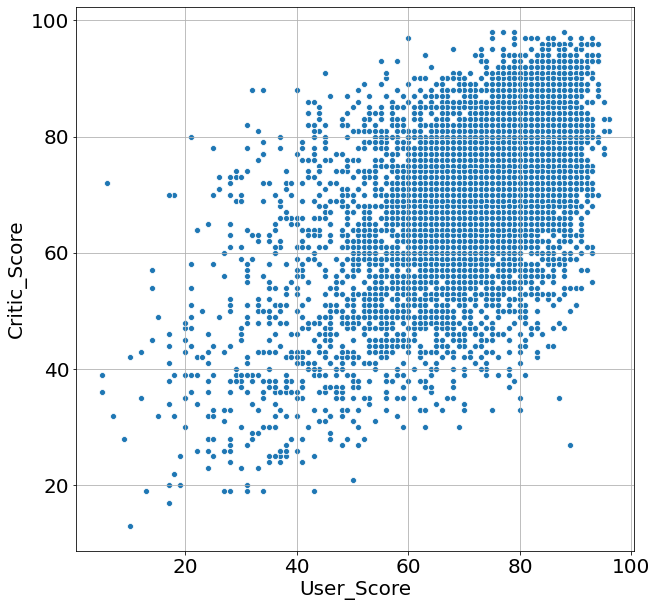

In [18]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x="User_Score", y="Critic_Score");
plt.grid()

In [19]:
data[(data['User_Score'] > 80) & (data['Critic_Score'] < 30)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5825,Shrek Swamp Kart Speedway,GBA,2002.0,Racing,TDK Mediactive,0.22,0.08,NaN,0.01,0.3,27.0,5.0,89.0,19.0,Prolific,E


## User score vs. Critics Score

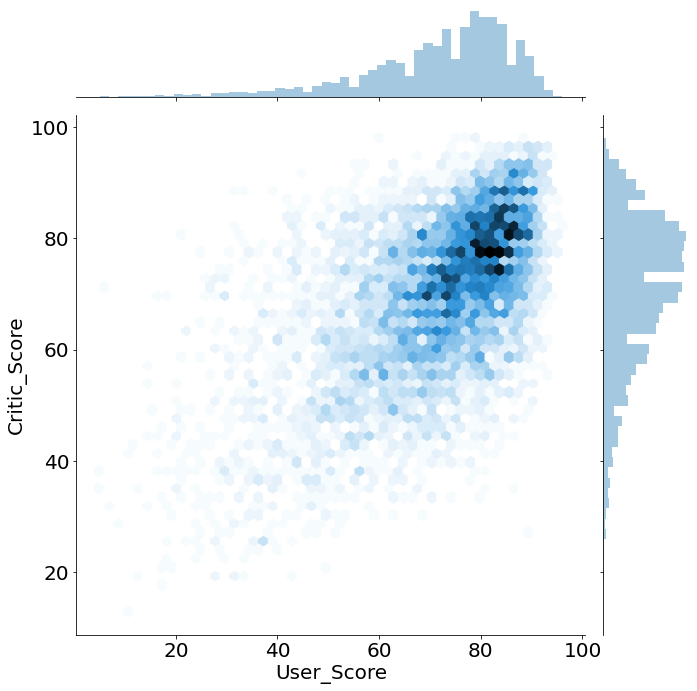

In [20]:
sns.jointplot(data=data, kind="hex", x="User_Score", y="Critic_Score",  height=10.0);

User ratings are correlated with Critic ratings, but there are exceptions!

### 7th-Generation Console War: PS3 vs. XBOX 360 vs. Wii

In [21]:
data_7th = data[data['Platform'].isin(['PS3', 'X360', 'Wii'])]
data_7th_agg = data_7th.groupby(['Year_of_Release','Platform'])['Global_Sales'].sum().reset_index()

data_7th_agg.head(10)

,Year_of_Release,Platform,Global_Sales
0,2005.0,X360,8.27
1,2006.0,PS3,20.95
2,2006.0,Wii,137.12
3,2006.0,X360,51.66
4,2007.0,PS3,73.14
5,2007.0,Wii,152.89
6,2007.0,X360,95.43
7,2008.0,PS3,118.48
8,2008.0,Wii,171.45
9,2008.0,X360,135.25


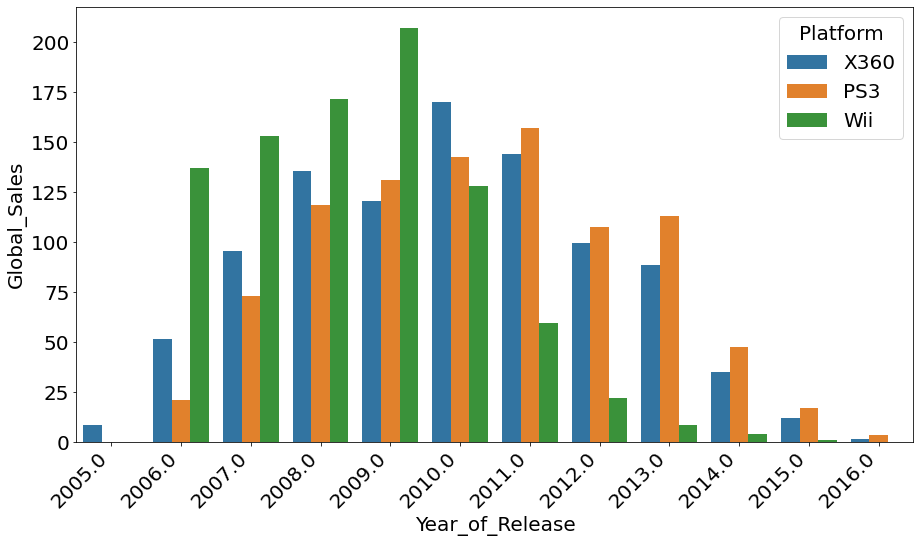

In [22]:
g=sns.barplot(data=data_7th_agg, x='Year_of_Release', y="Global_Sales", hue="Platform")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

Wii was more popular until 2009, then PS3 and XBOX 360 took over.

Overall, it was a tight competition

### 8th-Generation Console War: PS4 vs. XBOX One vs. WiiU

In [23]:
data_8th = data[(data['Platform'] == 'WiiU') | (data['Platform'] == 'PS4') | (data['Platform'] == 'XOne')]
data_8th_agg = data_8th.groupby(['Year_of_Release','Platform'])['Global_Sales'].sum().reset_index()

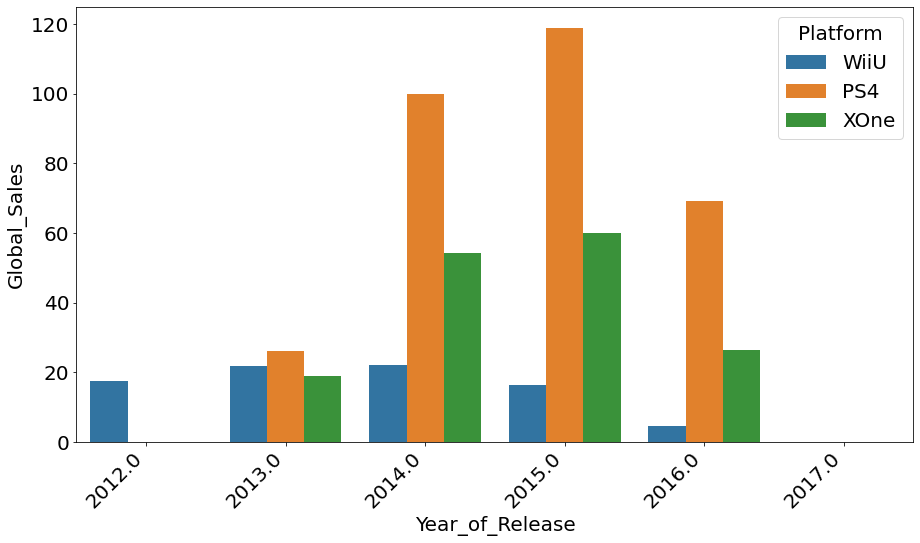

In [24]:
g=sns.barplot(data=data_8th_agg, x='Year_of_Release', y="Global_Sales", hue="Platform")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

PS4 is the clear winner in this generation

## Evolution of Genre

In [25]:
data_gen = data#data[data['Genre'].isin(['Action', 'Platform'])]
data_gen_agg = data_gen.groupby(['Year_of_Release','Genre'])['Global_Sales'].sum().reset_index()

In [26]:
data_gen_agg.head(5)

,Year_of_Release,Genre,Global_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.71
3,1980.0,Shooter,7.07
4,1980.0,Sports,0.49


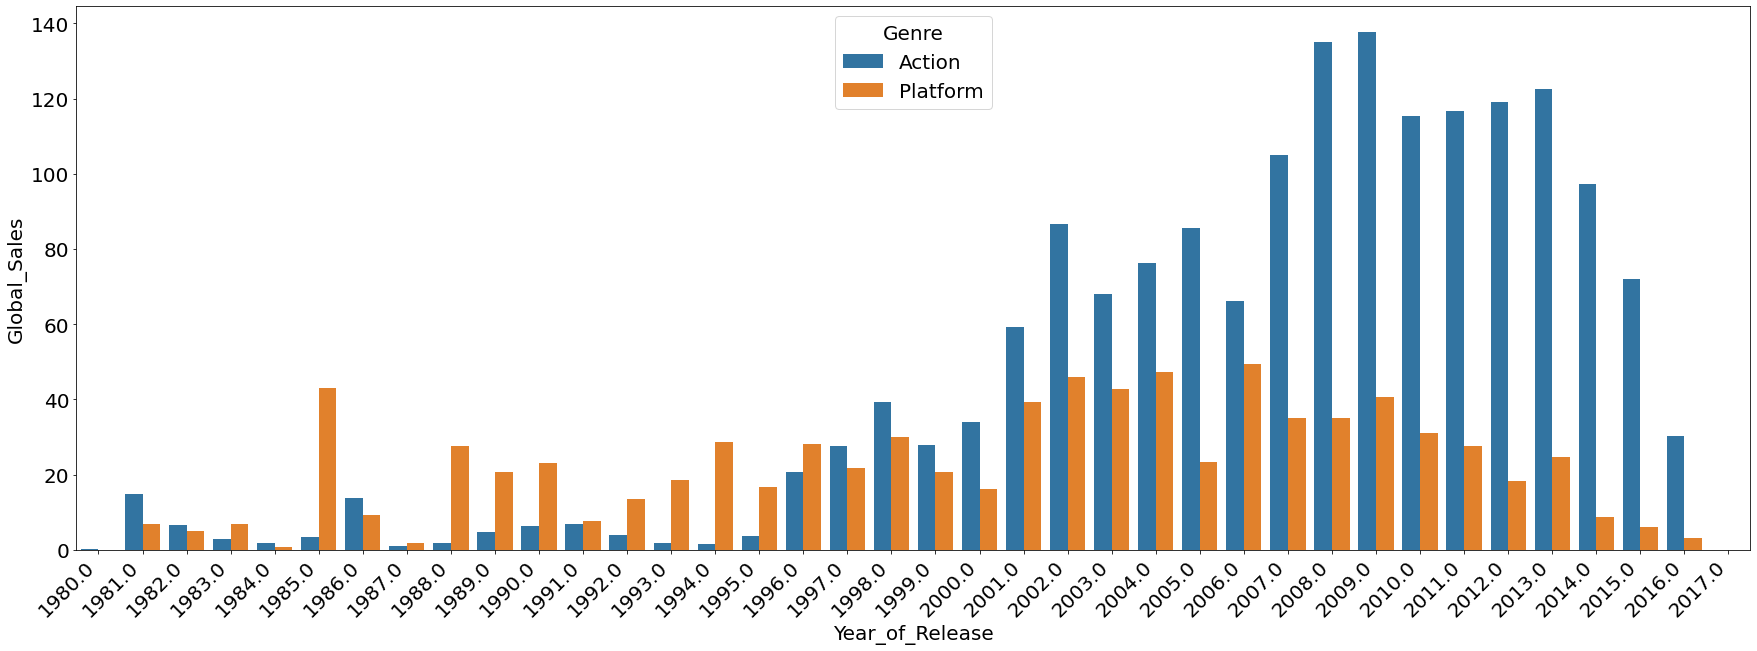

In [27]:
data_plot = data_gen_agg[data_gen_agg['Genre'].isin(['Action', 'Platform'])]
plt.figure(figsize=(30, 10))
g=sns.barplot(data=data_plot, x='Year_of_Release', y="Global_Sales", hue="Genre")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

Action game dominate nowadays, but platform (2D games) used to be very populay in the '90s

In [28]:
#sns.lineplot(data=data_gen_agg, x='Year_of_Release', y="Global_Sales", hue="Genre");

### Normalize by year

In [29]:
sales_year = data_gen_agg.groupby("Year_of_Release").sum().reset_index()
sales_year = sales_year.rename({'Global_Sales': 'Global_Sales_Year'}, axis="columns")

In [30]:
data_gen_agg_share = data_gen_agg.merge(sales_year)
data_gen_agg_share['Global_Share'] = 100* data_gen_agg_share['Global_Sales']/data_gen_agg_share['Global_Sales_Year']

In [31]:
data_gen_agg_share

,Year_of_Release,Genre,Global_Sales,Global_Sales_Year,Global_Share
0,1980.0,Action,0.34,11.38,2.987698
1,1980.0,Fighting,0.77,11.38,6.766257
2,1980.0,Misc,2.71,11.38,23.813708
3,1980.0,Shooter,7.07,11.38,62.126538
4,1980.0,Sports,0.49,11.38,4.305800
...,...,...,...,...,...
385,2016.0,Sports,23.53,130.10,18.086088
386,2016.0,Strategy,1.15,130.10,0.883935
387,2017.0,Action,0.01,0.06,16.666667
388,2017.0,Role-Playing,0.05,0.06,83.333333


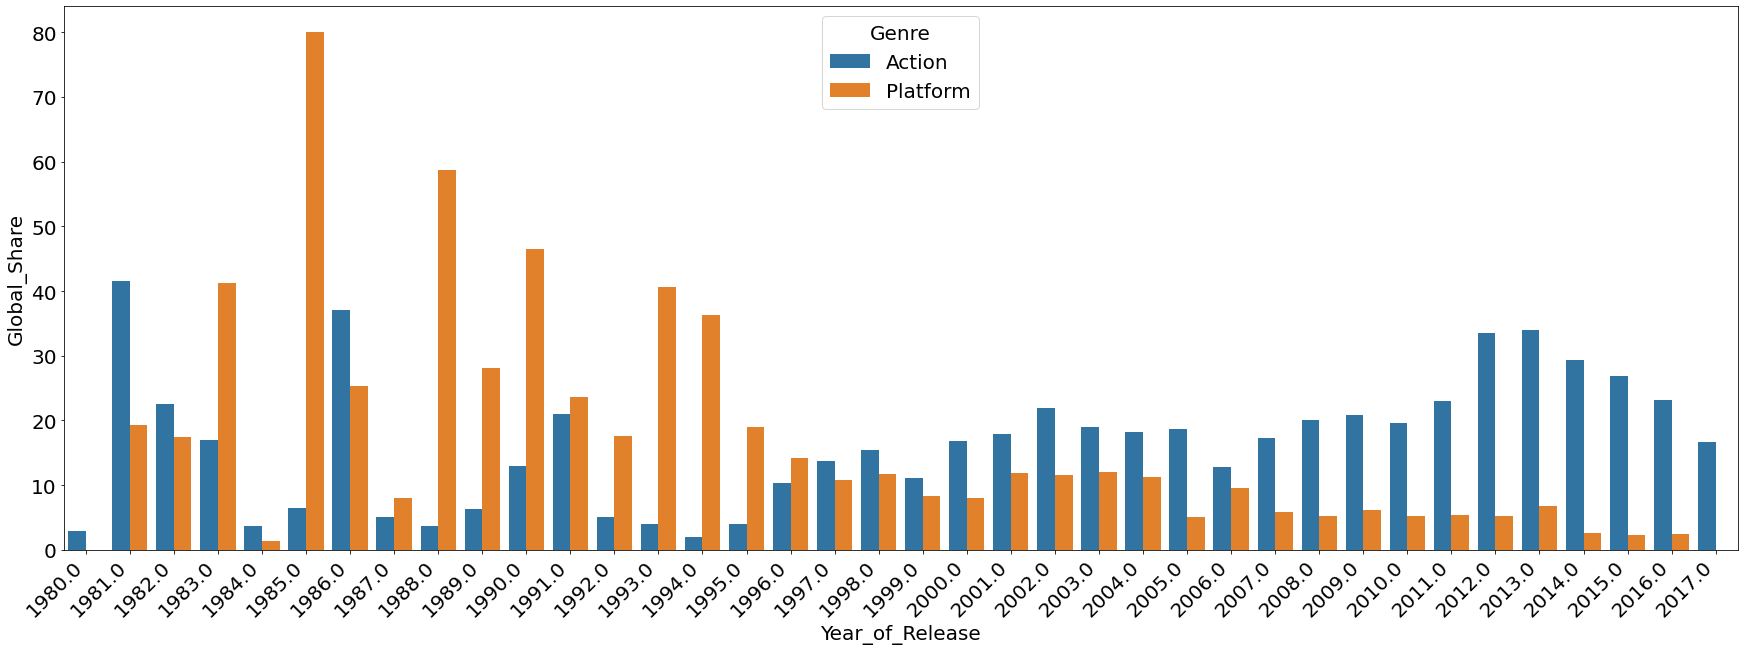

In [32]:
data_plot = data_gen_agg_share[data_gen_agg_share['Genre'].isin(['Action', 'Platform'])]
plt.figure(figsize=(30, 10))
g=sns.barplot(data=data_plot, x='Year_of_Release', y="Global_Share", hue="Genre");
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

In [67]:
data_year = data.groupby("Year_of_Release")["Global_Sales"].sum()
data_year_genre = data.groupby(["Year_of_Release", "Genre"])[["Global_Sales"]].sum()
data_year_genre["Global_Share"] = data_year_genre["Global_Sales"]/data_year * 100
data_year_genre = data_year_genre.reset_index()
data_year_genre.head(5)

,Year_of_Release,Genre,Global_Sales,Global_Share
0,1980.0,Action,0.34,2.987698
1,1980.0,Fighting,0.77,6.766257
2,1980.0,Misc,2.71,23.813708
3,1980.0,Shooter,7.07,62.126538
4,1980.0,Sports,0.49,4.305800


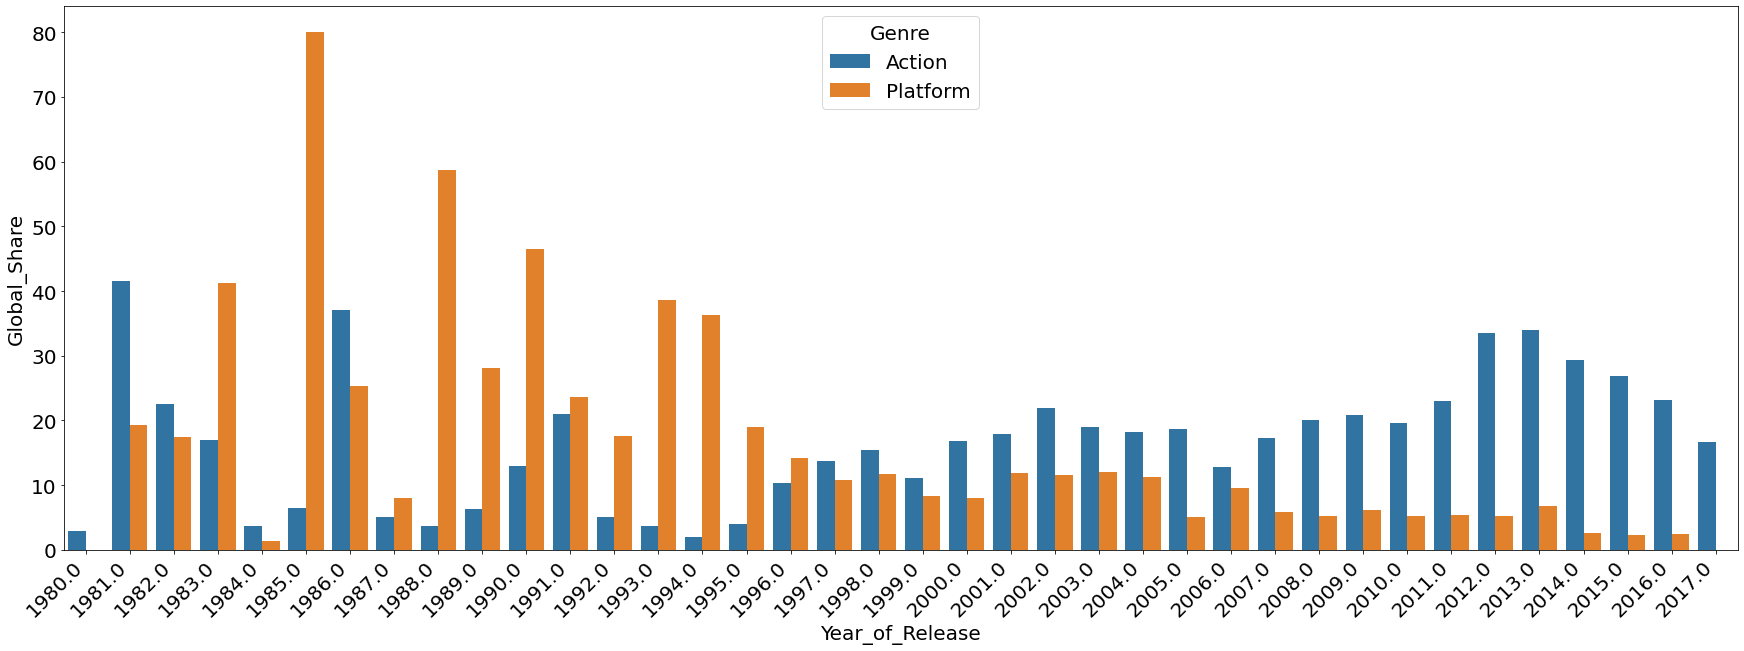

In [69]:
data_plot = data_year_genre[data_year_genre['Genre'].isin(['Action', 'Platform'])]
plt.figure(figsize=(30, 10))
g=sns.barplot(data=data_plot, x='Year_of_Release', y="Global_Share", hue="Genre");
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');